In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa matplotlib tqdm

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Dataset paths
data_paths = [
    "/content/drive/MyDrive/Audio_Song_Actors_01-24",
    "/content/drive/MyDrive/Audio_Speech_Actors_01-24"
]

# Output directory
output_path = "spectrograms_combined"
os.makedirs(output_path, exist_ok=True)

# Emotion mapping from RAVDESS
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Create emotion folders
for emotion in emotion_map.values():
    os.makedirs(os.path.join(output_path, emotion), exist_ok=True)

# Process both datasets
for data_path in data_paths:
    for actor in tqdm(os.listdir(data_path), desc=f"Processing {os.path.basename(data_path)}"):
        actor_path = os.path.join(data_path, actor)
        if not os.path.isdir(actor_path): continue

        for filename in os.listdir(actor_path):
            if filename.endswith(".wav"):
                parts = filename.split("-")
                emotion_code = parts[2]
                emotion = emotion_map.get(emotion_code)

                if emotion is None: continue

                audio_file = os.path.join(actor_path, filename)
                try:
                    y, sr = librosa.load(audio_file)
                    S = librosa.feature.melspectrogram(y=y, sr=sr)
                    S_dB = librosa.power_to_db(S, ref=np.max)

                    # Save spectrogram image
                    plt.figure(figsize=(3, 3))
                    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
                    plt.axis('off')
                    save_path = os.path.join(output_path, emotion, f"{os.path.basename(data_path)}_{actor}_{filename.replace('.wav', '.png')}")
                    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
                    plt.close()

                except Exception as e:
                    print(f"Failed to process {audio_file}: {e}")


Processing Audio_Speech_Actors_01-24: 100%|██████████| 25/25 [19:07<00:00, 45.91s/it]


In [ ]:
emotion_folders = os.listdir("spectrograms_combined")
print("Emotion folders found:", emotion_folders)

# Count how many files in each folder
for emotion in emotion_folders:
    folder_path = os.path.join("spectrograms_combined", emotion)
    num_files = len([f for f in os.listdir(folder_path) if f.endswith(".png")])
    print(f"{emotion}: {num_files} files")

Emotion folders found: ['angry', 'happy', 'fearful', 'sad', 'disgust', 'calm', 'surprised', 'neutral']
angry: 376 files
happy: 376 files
fearful: 376 files
sad: 376 files
disgust: 192 files
calm: 376 files
surprised: 192 files
neutral: 188 files


In [ ]:
print(os.listdir("spectrograms_combined/happy")[:10])

['Audio_Speech_Actors_01-24_Actor_12_03-01-03-01-01-02-12.png', 'Audio_Song_Actors_01-24_Actor_07_03-02-03-01-02-02-07.png', 'Audio_Song_Actors_01-24_Actor_17_03-02-03-02-01-02-17.png', 'Audio_Speech_Actors_01-24_Actor_24_03-01-03-01-02-01-24.png', 'Audio_Speech_Actors_01-24_Actor_07_03-01-03-01-02-02-07.png', 'Audio_Speech_Actors_01-24_Actor_06_03-01-03-01-01-01-06.png', 'Audio_Song_Actors_01-24_Actor_01_03-02-03-01-01-02-01.png', 'Audio_Song_Actors_01-24_Actor_20_03-02-03-02-02-02-20.png', 'Audio_Song_Actors_01-24_Actor_08_03-02-03-01-02-01-08.png', 'Audio_Speech_Actors_01-24_Actor_02_03-01-03-01-02-01-02.png']


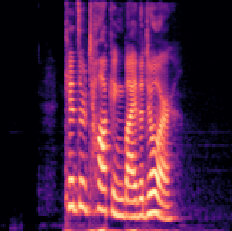

In [ ]:
from IPython.display import Image, display

# Display a specific image (change path if needed)
display(Image("spectrograms_combined/happy/Audio_Speech_Actors_01-24_Actor_12_03-01-03-01-01-02-12.png"))

In [ ]:
import shutil

# Source: Colab local folder
source_folder = "spectrograms_combined"

# Destination: Google Drive folder
destination_folder = "/content/drive/MyDrive/spectrograms_combined"

# Copy entire folder to Drive
shutil.copytree(source_folder, destination_folder)

print(f"Saved to: {destination_folder}")

Saved to: /content/drive/MyDrive/spectrograms_combined


In [ ]:
import os

folder_path = "/content/drive/MyDrive/spectrograms_combined/neutral"
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in 'angry': {num_files}")

Number of files in 'angry': 188
